# Kitabxanalar

In [408]:
import  pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from lazypredict.Supervised import LazyRegressor 
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import *

# Datanı Oxuyuruq

In [409]:
dataframe = pd.read_csv("student_marks.csv")

In [410]:
#datanın kopyasını alırıq.
data = dataframe.copy()

In [411]:
#dataya ön baxış
data.head()

,Student_ID,Test_1,Test_2,Test_3,Test_4,Test_5,Test_6,Test_7,Test_8,Test_9,Test_10,Test_11,Test_12
0,22000,78,87,91,91,88,98,94,100,100,100,100,93
1,22001,79,71,81,72,73,68,59,69,59,60,61,67
2,22002,66,65,70,74,78,86,87,96,88,82,90,86
3,22003,60,58,54,61,54,57,64,62,72,63,72,76
4,22004,99,95,96,93,97,89,92,98,91,98,95,88


In [412]:
#Student_ID sütununu atırıq
data.drop(columns = "Student_ID",axis = 1,inplace = True)

# EDA

In [413]:
def info (data):
    
    """
      Data haqqında ümumi informasiya alır.
      
      param data: Dataframe.
    """
    
    print("Analizə başlanılır.\n\n")
    print(f"Category sütunlar: {(data.select_dtypes(include='object').columns).to_list()}")
    print(f"Category sütunlar say: {len(data.select_dtypes(include='object').columns)}\n\n")
    print(f"Numeric sütunlar: {(data.select_dtypes(include='number').columns).to_list()}")
    print(f"Numeric sütunlar say: {len(data.select_dtypes(include='number').columns)}\n\n")
    
    def unique_analiz(data,col_type="object"):
        """
            Data unique dəyərlərinibə və saylarına baxır.
            
            param data: Dataframe.
            param col_type: sütunların tipləri,(object,number).
         """
        print(f"{col_type.title()} type sütunlar üçün analiz:")
        for col in data.select_dtypes(include=col_type).columns:
            print(f"Sütun adı: {col}\n")
            print(f"Unique sayları: {data[col].nunique}\n")
            print(f"Unique dəyərlər: {data[col].unique}\n")
            print("-"*20)
        print("\n\n")

    if len(data.select_dtypes(include="object").columns)!=0:
        unique_analiz(data,"object")
    #if len(data.select_dtypes(include="number").columns)!=0:
        #unique_analiz(data,"number")
    
    if data.isnull().sum().sum()==0:
        print("Datada Çatışmayan dəyər yoxdur.")
    else:
        for col in columns:
            print(f"Sütun adı: {col}\n")
            print(f"Çatımayan dəyərlərin sayı : {data[col].isnull().sum()}\n")
            print("-"*20)
    print("\n\nAnaliz bitdi.")

In [414]:
info(data)

Analizə başlanılır.


Category sütunlar: []
Category sütunlar say: 0


Numeric sütunlar: ['Test_1', 'Test_2', 'Test_3', 'Test_4', 'Test_5', 'Test_6', 'Test_7', 'Test_8', 'Test_9', 'Test_10', 'Test_11', 'Test_12']
Numeric sütunlar say: 12


Datada Çatışmayan dəyər yoxdur.


Analiz bitdi.


In [415]:
#target sütununu ayırırıq.
y = data["Test_12"]
data.drop(columns = "Test_12",axis = 1,inplace = True)

In [416]:
#sütunların statistik göstəricilərinə baxaq.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Test_1,56.00,70.75,17.01,40.00,57.75,70.50,84.00,100.00
Test_2,56.00,69.20,17.71,34.00,55.75,68.50,83.25,100.00
Test_3,56.00,68.09,18.84,35.00,53.00,70.00,85.00,100.00
Test_4,56.00,67.45,19.81,28.00,54.50,71.50,84.00,100.00
Test_5,56.00,67.30,20.75,26.00,53.75,69.00,85.25,100.00
Test_6,56.00,66.00,21.05,29.00,50.25,65.50,83.75,100.00
Test_7,56.00,66.16,21.43,26.00,47.00,64.00,85.25,100.00
Test_8,56.00,65.30,22.73,19.00,45.75,67.50,83.25,100.00
Test_9,56.00,64.39,23.21,9.00,44.00,65.50,84.25,100.00
Test_10,56.00,64.25,22.60,12.00,45.75,65.50,83.25,100.00


Buradan sütunların median və mean dəyərlərinə baxdıqda görünür ki, bütün datalarımız hardasa  normal dağılım göstərir.

In [417]:
#sütunların dağılımlarına baxaq.Bunun üçün bir funksiya yazaq.
def hist_plot(data):
    """
      Histplot çəkmək üçün funksiya.
      
      param data: Dataframe.
    """
    fig,ax = plt.subplots(nrows=(len(data.columns)//2+1),ncols=2,figsize=(15,22))
    plt.figure(figsize=(20,20))
    i=0;j=0
    for col in data.columns:
        if i==2:
            j=j+1
            i=0
        sns.histplot(data[col],kde = True,ax=ax[j][i])
        i=i+1

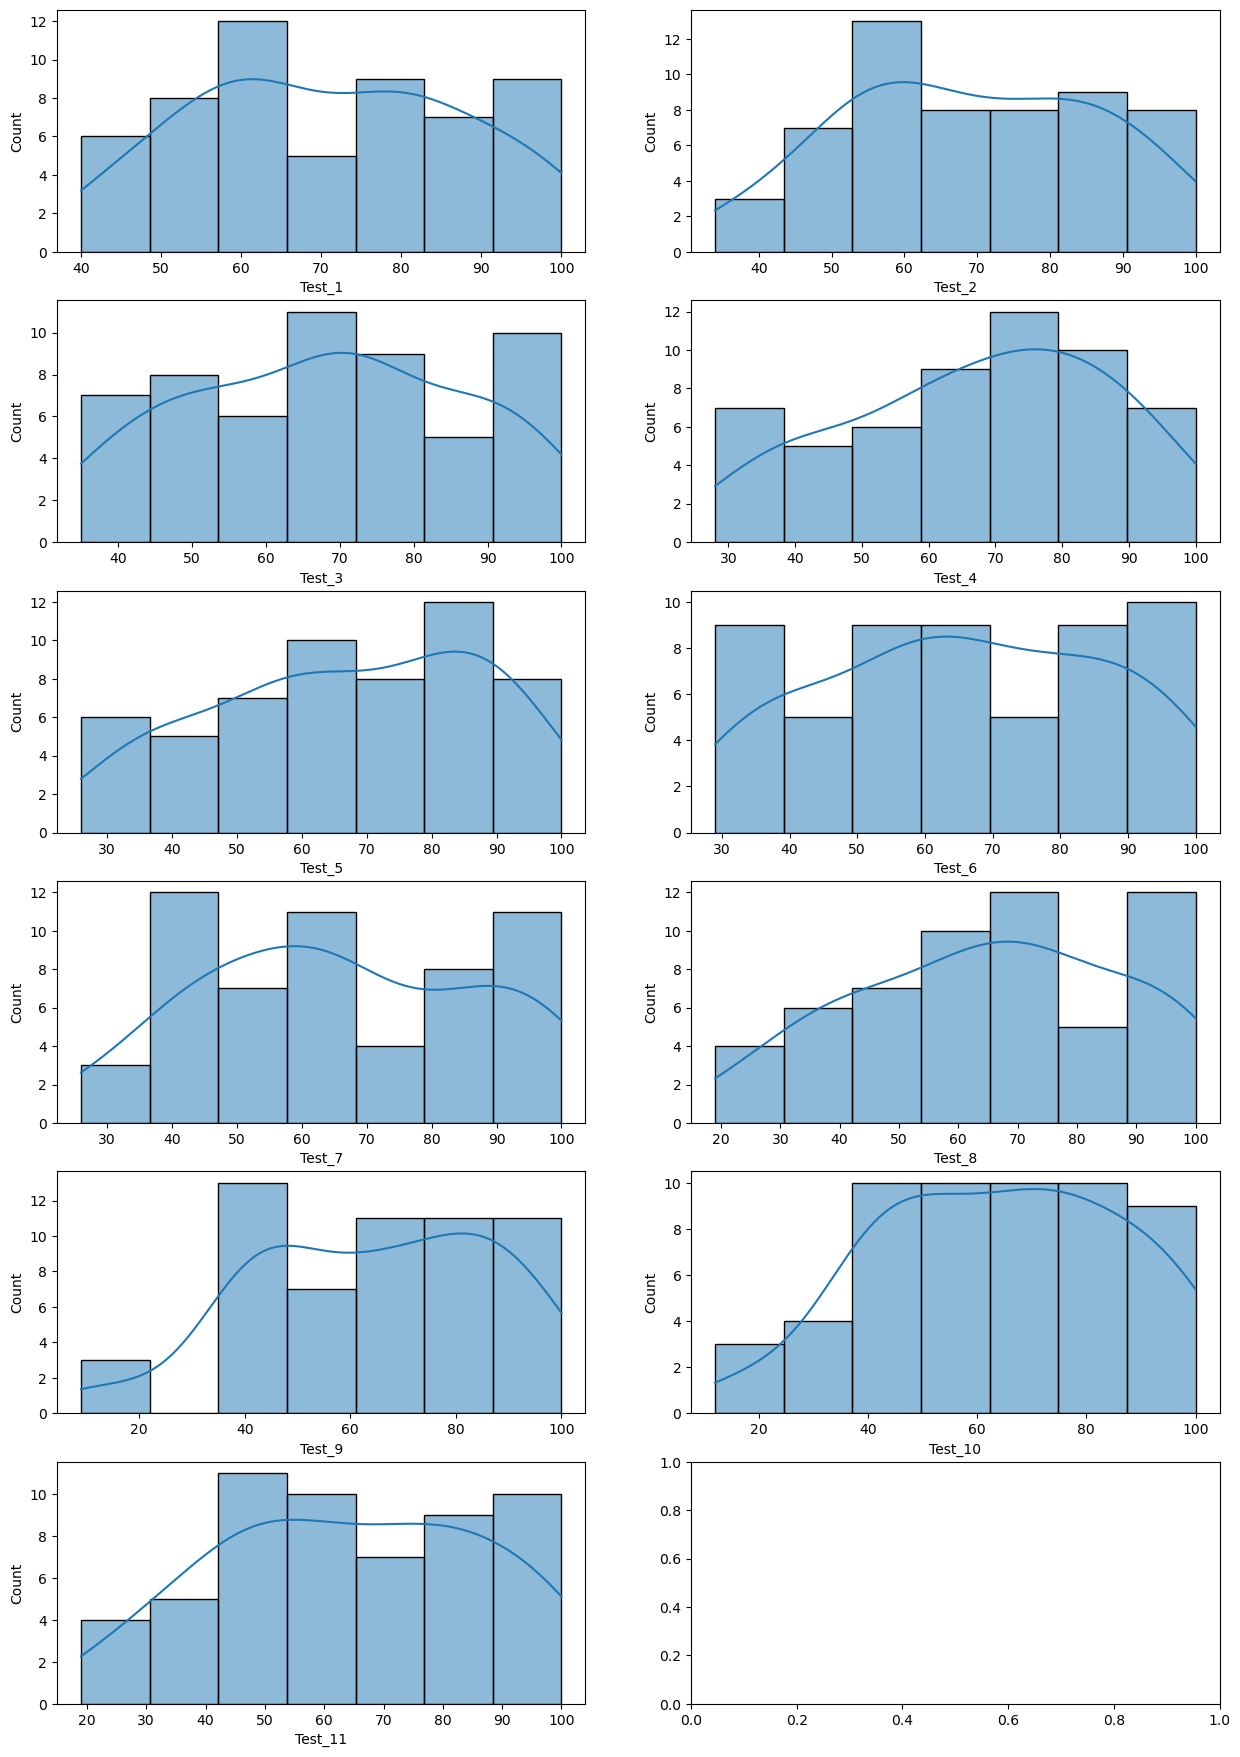

<Figure size 2000x2000 with 0 Axes>

In [418]:
hist_plot(data)

### Sütunların bir-biri ilə dağılımlarına baxaq.

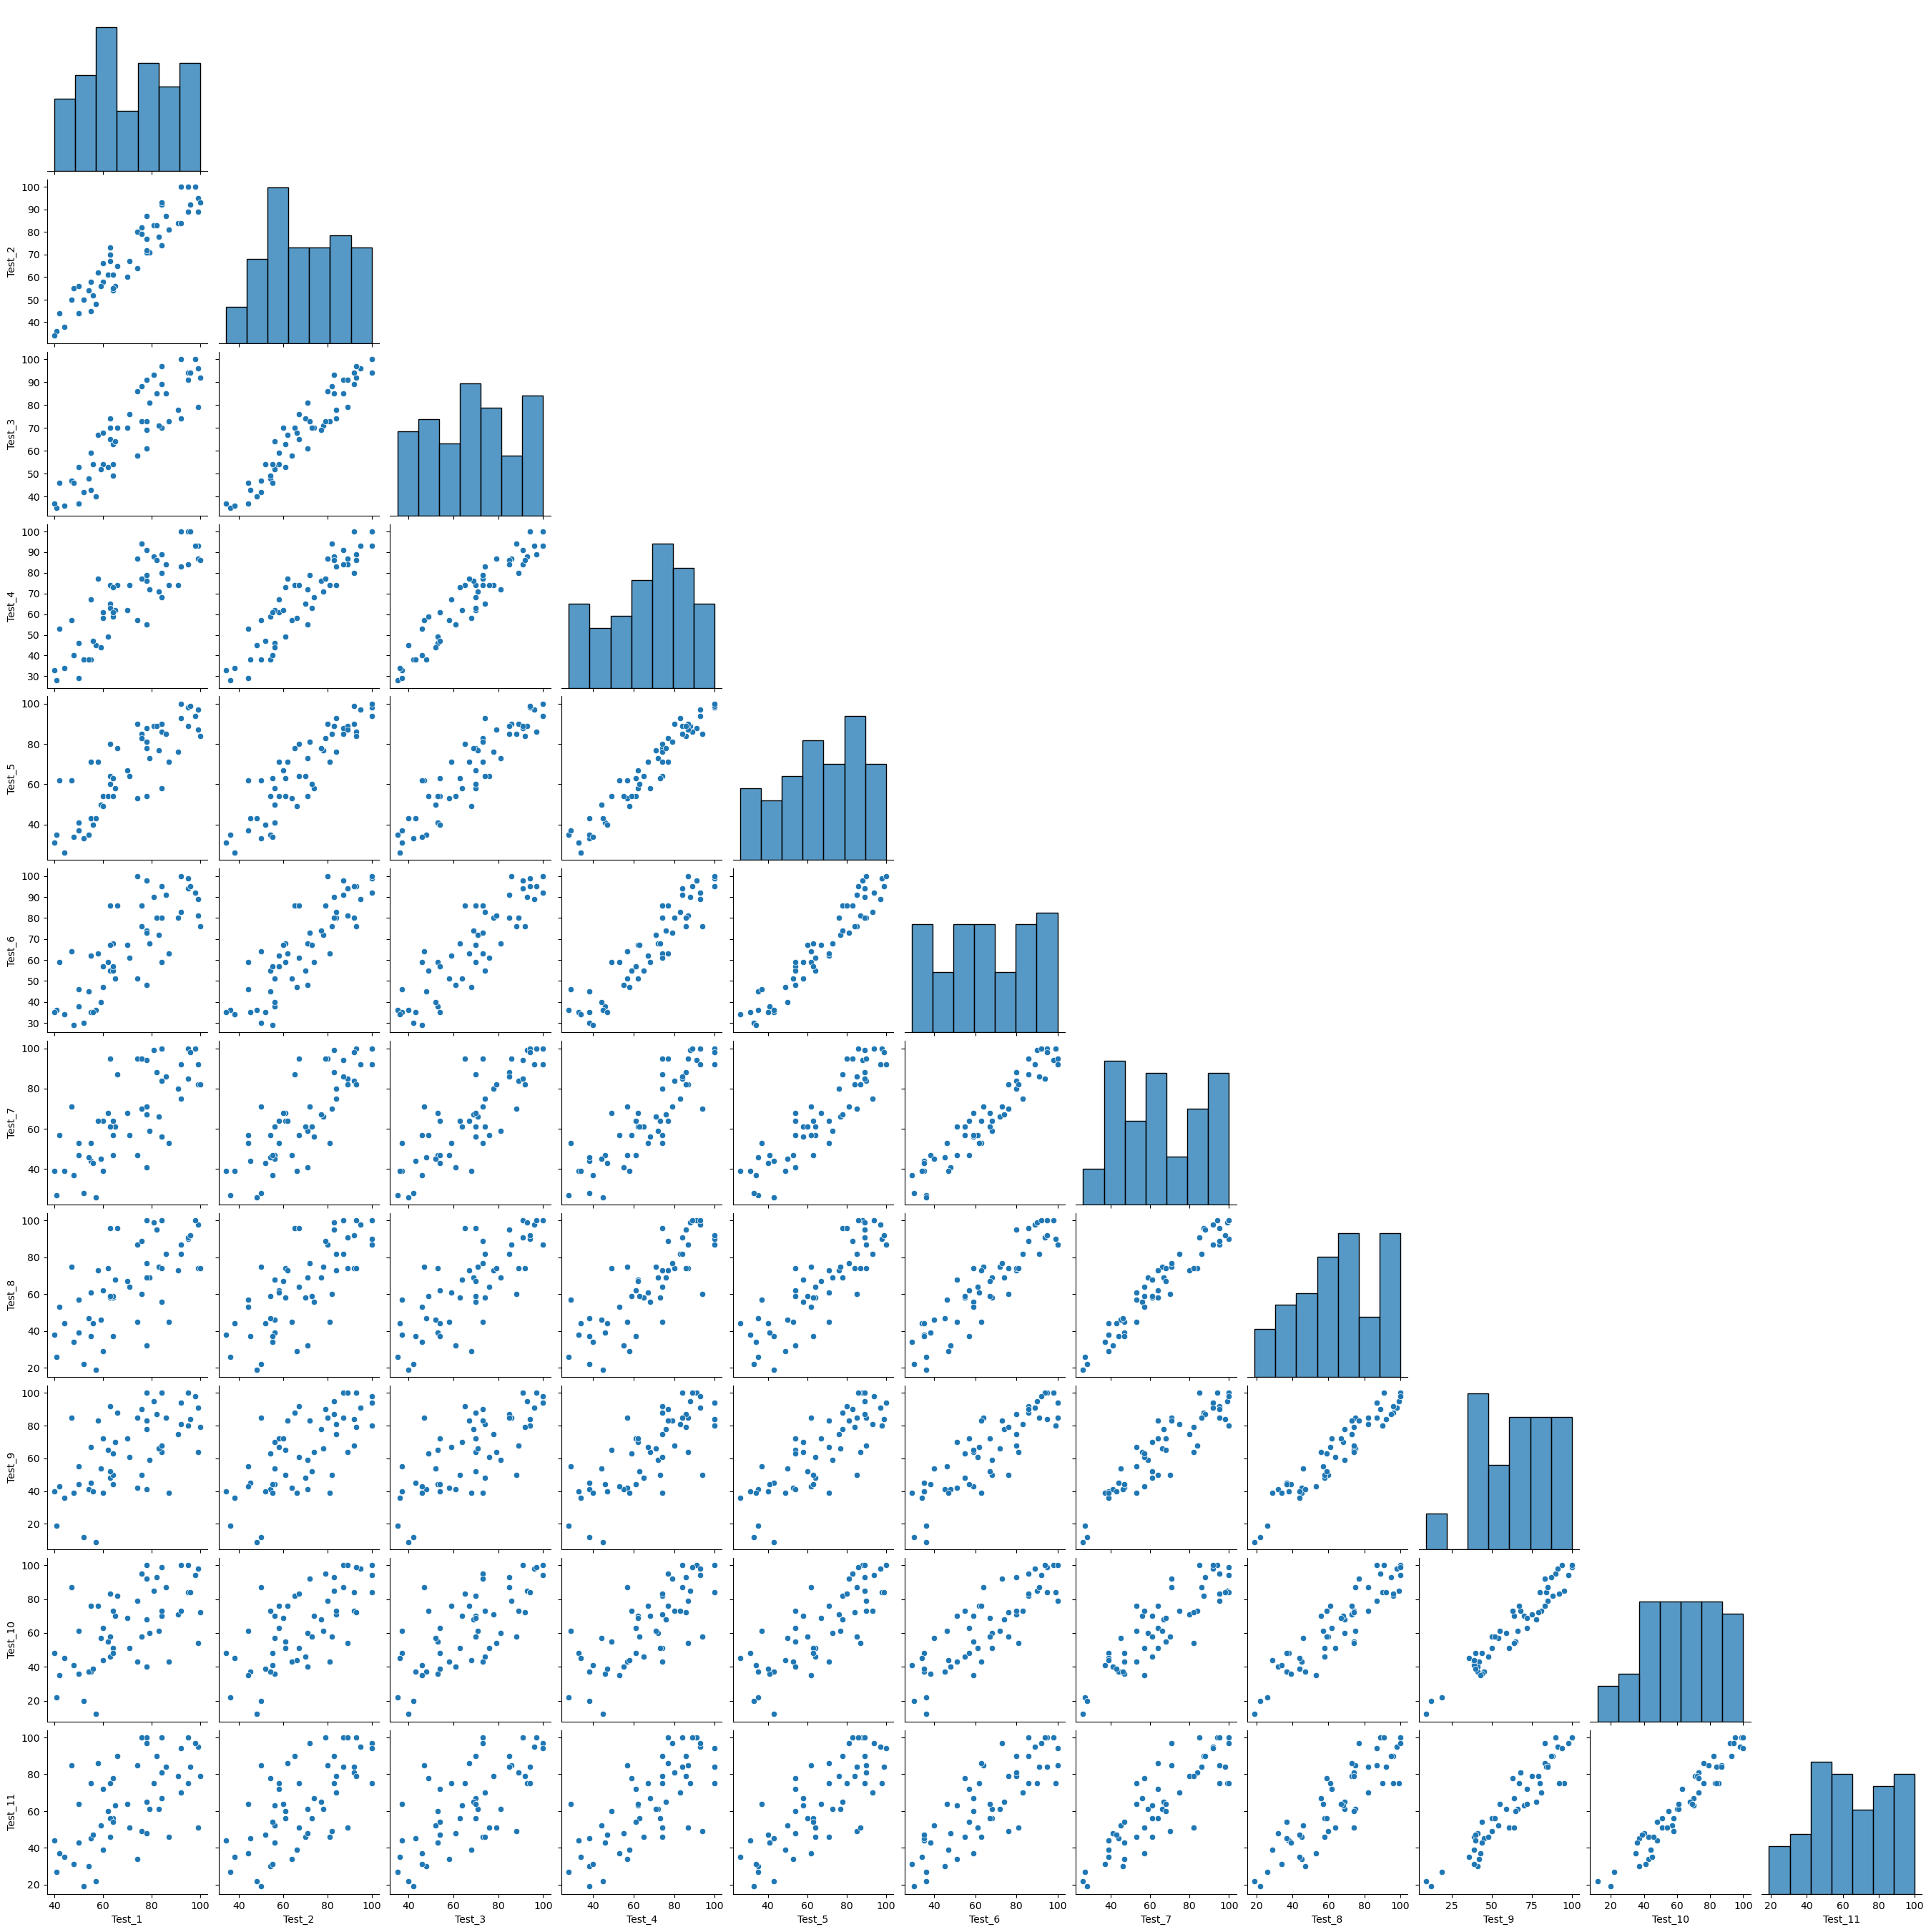

In [419]:
#sütunların bir birləri ilə dağılımlarına baxaq.Bunun üçün bir funksiya yazaq.
sns.pairplot(data,corner=True)

Buradan görünür ki bəzi sütunlar arasında dağılım özünü linear formada göstərir.Bunu təsdiqləmək üçün onların corelation-larına baxmaq lazımdır.

### Bu sütunların bir birləri ilə corelation-na baxaq.

<Axes: >

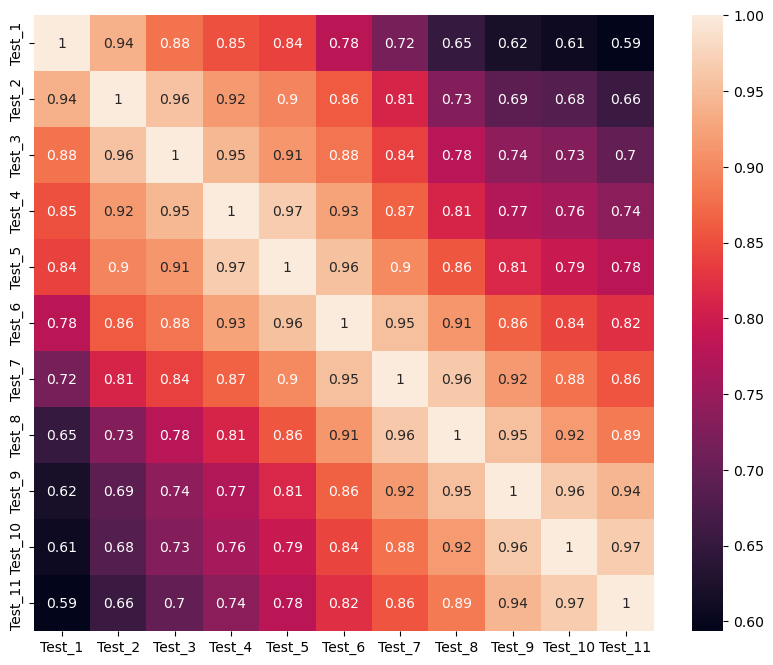

In [420]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)

Buradan görünür ki, bəzi sütunlar arasında çox yüksək corelation var. Bu sütunlar bizdə overfitting yarada biləcəyindən biz bu sütunları müəyyən etməli və onların target sütununa görə ən çox corelation göstərinini saxlamalı digərlərini isə atmalıyıq.

In [421]:
#corelationu 0.95 dən böyük olan sütun cütlərini almaq üçün funksiya yazaq.
def corelation_analiz(data):
    """
      Corelation analiz  üçün funksiya.
      
      param data : Dataframe.
      
      return pair_columns: (yüksək corelation olan swtun cütlükləri).
    """
        columns = list(data.columns)
        pair_columns=list()
        for col1 in columns:
            for col2 in columns:
                if col1 != col2:
                    correlation = data[col1].corr(data[col2])
                    if correlation > 0.95:
                        pair_columns.append((col1,col2))
        return pair_columns

In [422]:
pair_columns = corelation_analiz(data)

In [423]:
pair_columns = pair_columns[::2]
pair_columns
#corelationu 0.95 dən böyük olan sütun cütləri

[('Test_2', 'Test_3'),
 ('Test_4', 'Test_5'),
 ('Test_5', 'Test_6'),
 ('Test_6', 'Test_7'),
 ('Test_7', 'Test_8'),
 ('Test_8', 'Test_9'),
 ('Test_9', 'Test_10'),
 ('Test_10', 'Test_11')]

In [424]:
#cütlüklər içərisindən target sütunu ilə corelationu böyük olan sütunları alırıq.
def target_corel(data,y,pair_columns):
    """
      target ilə digər sütunların corelation analizi.
      
      param data: Dataframe.
      param y: target values.
      param pair_columns: (yüksək corelation olan swtun cütlükləri)
      
      return: cor_col (cütlərdən target ilə corelationu çox olan sütunlar)
    """
    cor_col = []
    for pair in pair_columns:
        col1 = pair[0]
        col2 = pair[1]
        if col1 not in cor_col:           
            if y.corr(data[col1])>y.corr(data[col2]):
                cor_col.append(col1)
            cor_col.append(col2)
            
    return cor_col

In [425]:
cols = target_corel(data,y,pair_columns)

In [426]:
#target sütunu ilə corelationu böyük olan sütunlar
cols

['Test_3', 'Test_5', 'Test_7', 'Test_9', 'Test_11']

In [427]:
#Bu kolumları artıq ata bilərik.
data.drop(columns = cols,axis = 1,inplace = True)

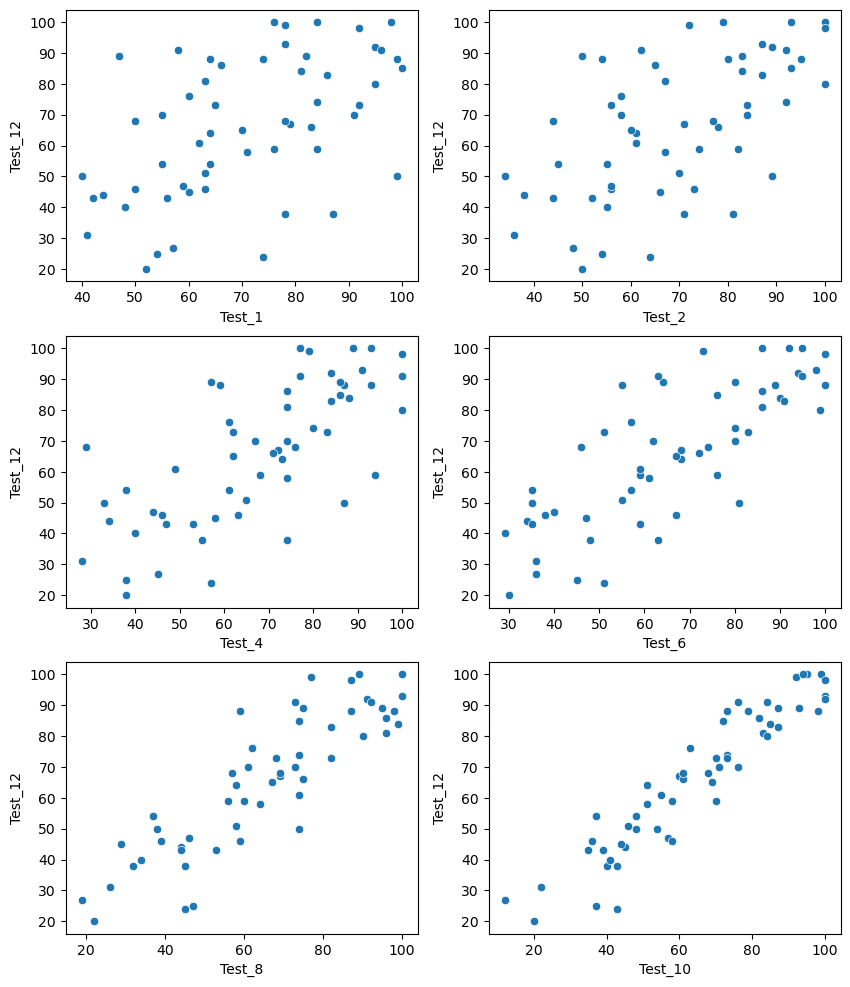

<Figure size 2000x2000 with 0 Axes>

In [428]:
data = data.join(y)#target sütununu dataya əlavə etdik.
#asılı olmayan sütunlar ilə target sütunun  dağılımına baxaq.Bunun üçün bir funksiya yazaq.
fig,ax = plt.subplots(nrows=(len(data.columns)//2),ncols=2,figsize=(10,12))
plt.figure(figsize=(20,20))
i=0;j=0
for col in data.columns:
    if col=="Test_12":
        continue
    if i==2:
        j=j+1
        i=0
    sns.scatterplot(data,x=col,y="Test_12" ,ax=ax[j][i])
    i=i+1

In [ ]:
data["Test_3_WOE"].isnull().sum()

Buradan görünür ki sütunlar target sütunu ilə güclü linear dağılmasa belə bəzi sütunlar kifayət qədər linear dağılır.Bunu dəqiqləşdirmək üçün target sütununa görə corelation analizi edək.

In [ ]:
data.corr()["Test_12"]

Buradan görmək olur ki, Test_10 və Test_12 sütunu bir birləri ilə 90+ corelation göstərir.Və digər kolumlarında corelationu azlıq təşkil etmir.Biz Test_10 sütununu atarıq.Digər sütunlar ilə analizimizi dəvam etdirə bilərik.Həmçinin biz Test_1 sütunu ilə Test_2 sütunun öz aralarında güclü korelation olduğunu bilirdik. Target sütununa görə də corelationları çox yaxın dəyərlərdir.Buradan da əslində bu iki sütunun uyğun dəyərləri toplayaraq ortalamasını ala bilərk.Və digər iki sütunu ata bilərik.

In [429]:
data.drop(columns = "Test_10",axis = 1,inplace = True)

In [430]:
data["Test_1 and Test_2"] = (data["Test_1"]+data["Test_2"])/2

In [431]:
data.corr()["Test_12"]

Test_1              0.52
Test_2              0.59
Test_4              0.72
Test_6              0.79
Test_8              0.88
Test_12             1.00
Test_1 and Test_2   0.57
Name: Test_12, dtype: float64

Artıq Test_1 və Test_2 sütununu ata bilərik.

In [432]:
data.drop(columns = ["Test_1","Test_2"],axis = 1,inplace = True)

In [433]:
data.drop(columns = "Test_12",axis = 1,inplace = True)

Digər sütunları kategoriyalara ayıraq.İmtahan nəticələri olduğu üçün nəticələri 5 kateqoriyaya bölə bilərik. Və bu şəkildə həm də sütunların corelationunu aşağı çəkə bilərik.

In [434]:
for col in data.columns:
    quantiles = pd.cut(data[col],bins=[0,51,71,81,91,100],labels=[f"piss_{col}",f"kafi_{col}",f"orta_{col}",
                                                                   f"yaxşı_{col}",f"ela_{col}"])
    data[f'_{col}'] = quantiles

In [435]:
data.head()

,Test_4,Test_6,Test_8,Test_1 and Test_2,_Test_4,_Test_6,_Test_8,_Test_1 and Test_2
0,91,98,100,82.50,yaxşı_Test_4,ela_Test_6,ela_Test_8,yaxşı_Test_1 and Test_2
1,72,68,69,75.00,orta_Test_4,kafi_Test_6,kafi_Test_8,orta_Test_1 and Test_2
2,74,86,96,65.50,orta_Test_4,yaxşı_Test_6,ela_Test_8,kafi_Test_1 and Test_2
3,61,57,62,59.00,kafi_Test_4,kafi_Test_6,kafi_Test_8,kafi_Test_1 and Test_2
4,93,89,98,97.00,ela_Test_4,yaxşı_Test_6,ela_Test_8,ela_Test_1 and Test_2


In [436]:
#digər sütunları atarıq.
data.drop(columns = ["Test_1 and Test_2","Test_4","Test_6","Test_8"],axis = 1,inplace = True)

In [437]:
#kateqoriyaya bölünmüş halı.
data.head()

,_Test_4,_Test_6,_Test_8,_Test_1 and Test_2
0,yaxşı_Test_4,ela_Test_6,ela_Test_8,yaxşı_Test_1 and Test_2
1,orta_Test_4,kafi_Test_6,kafi_Test_8,orta_Test_1 and Test_2
2,orta_Test_4,yaxşı_Test_6,ela_Test_8,kafi_Test_1 and Test_2
3,kafi_Test_4,kafi_Test_6,kafi_Test_8,kafi_Test_1 and Test_2
4,ela_Test_4,yaxşı_Test_6,ela_Test_8,ela_Test_1 and Test_2


Bu kateqoriyaya bölünmüş sütunlar üçün analizlər aparaq.

In [438]:
data = data.join(y)

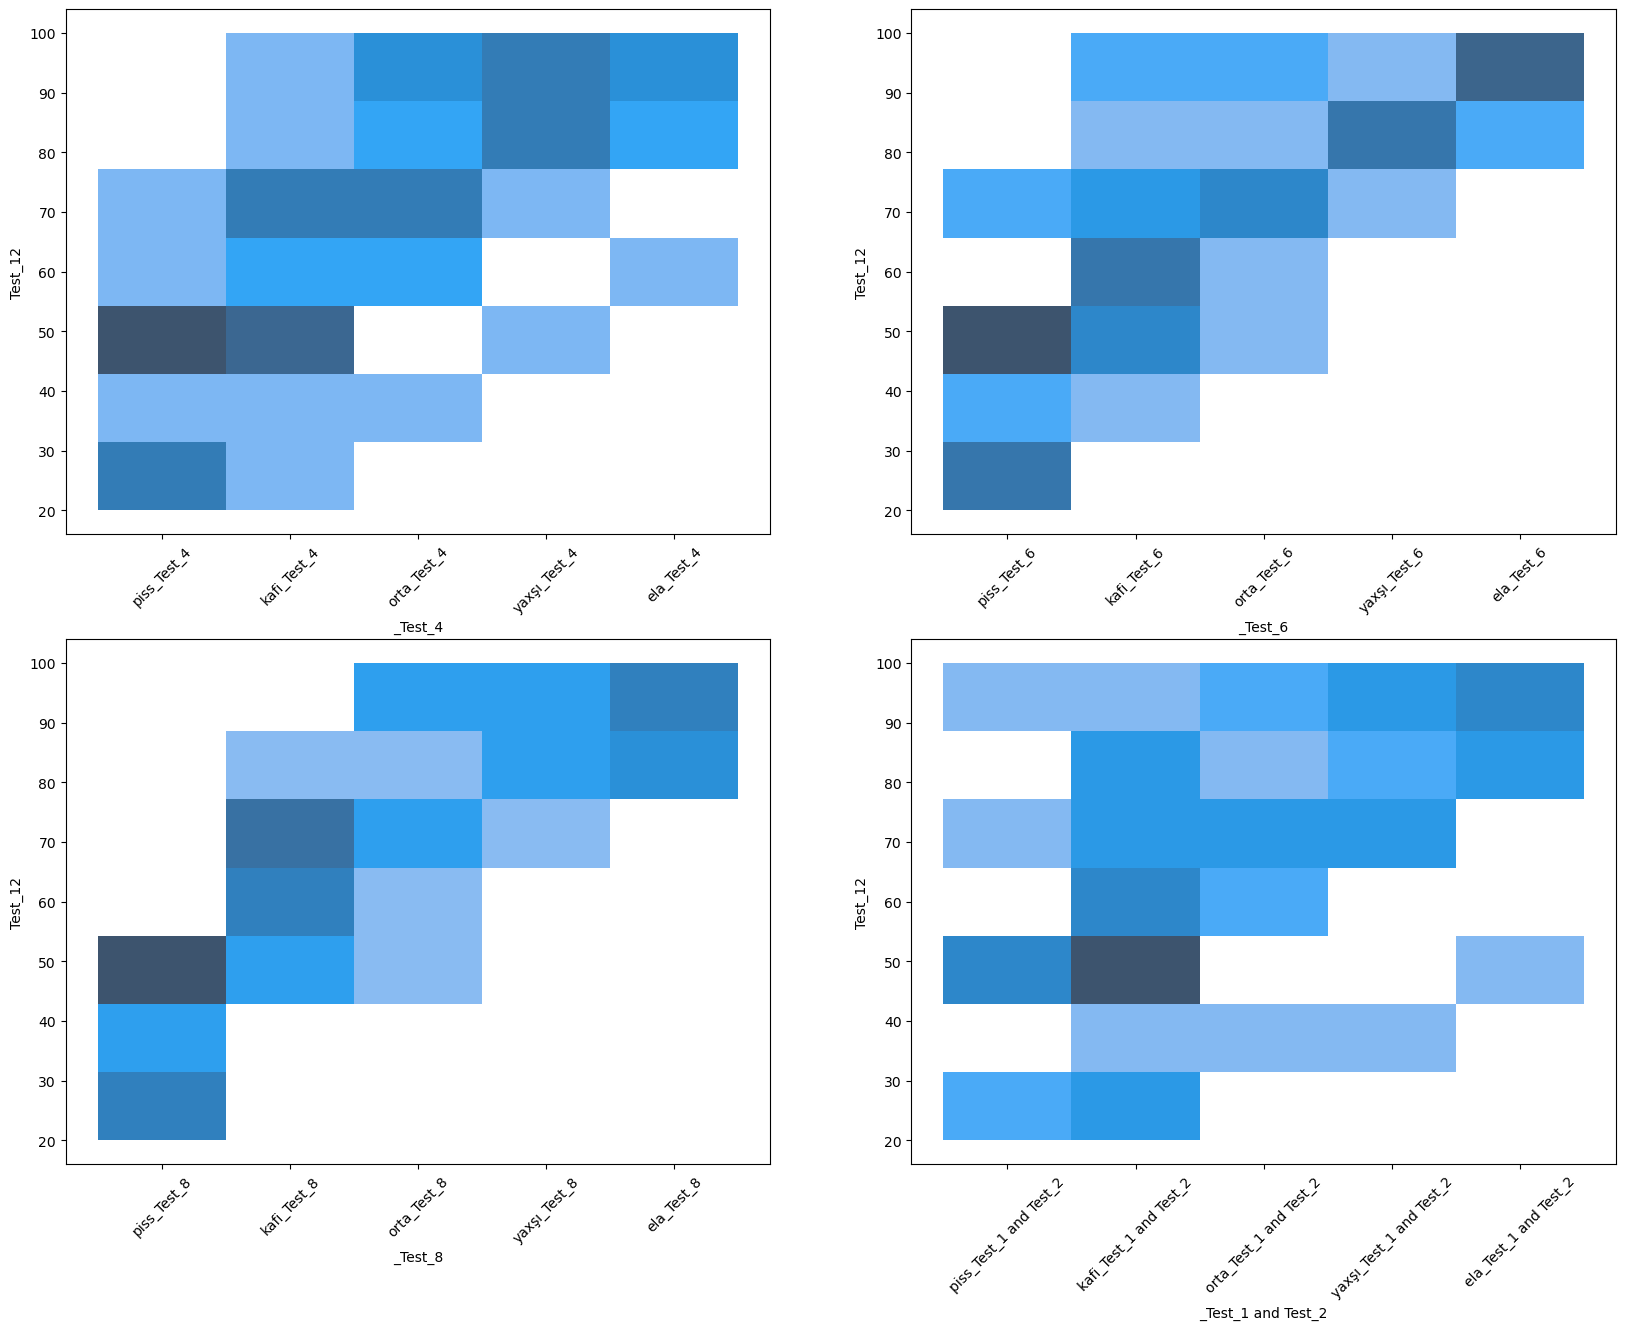

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

In [439]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(20,15))
i=0;j=0
for col in data.iloc[:,:-1].columns:
    data_group = data.groupby(col)["Test_12"].mean()
    data_group.reset_index()
    plt.figure(figsize=(20,20))
    if i==2:
        j=j+1
        i=0
    sns.histplot(data = data,x=col,y="Test_12",ax=ax[j][i])
    ax[j][i].tick_params(axis="x", rotation=45)
    i=i+1

Buradan görünür ki Test_1 və Test_2 sütunlarının birləşməsindən əmələ gələn nəticələrdə piss nəticə göstərənlərin əla skorları var.Test_4 və Test_6 sütunlarında belə piss nəticə göstərənlər içərisində orta skorları olan şəxslər var.

Artıq bu sütunları Ordinal Encoding edə bilərik. Burada 5 dəyər var ki, onlar sıralı dəyərlərdir.Və bu sıraya görə biz Ordinal Encoding edə bilərik.

In [440]:
def ordinal_encoding(data):
    """
      Ordinal encoding edən funksiya.
      
      param data: Dataframe.
    """
    for col in data.iloc[:,:-1]:
        ord_encoder = OrdinalEncoder(categories=[[f"piss{col}", f"kafi{col}", f"orta{col}", f"yaxşı{col}", f"ela{col}"]])
        data[col] = ord_encoder.fit_transform(data[col].values.reshape(-1, 1))

In [441]:
ordinal_encoding(data)

In [442]:
data.head()

,_Test_4,_Test_6,_Test_8,_Test_1 and Test_2,Test_12
0,3.00,4.00,4.00,3.00,93
1,2.00,1.00,1.00,2.00,67
2,2.00,3.00,4.00,1.00,86
3,1.00,1.00,1.00,1.00,76
4,4.00,3.00,4.00,4.00,88


# Train və Testə ayırmaq

In [443]:
X = data.drop(columns = "Test_12")
y = data["Test_12"]

In [444]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

# Xgboost model

In [445]:
#ən yaxşı hiperparametr-ləri tapaq.
params = {
        'n_estimators': list(range(50, 200,30)),
        'subsample': [0.3,0.4, 0.5,0.6],
        'max_depth': range(3,10),
        'learning_rate': np.linspace(0,0.5,10),}
            
model = XGBRegressor()

kf = KFold(n_splits=5, random_state=7,shuffle=True)
grid_cv = GridSearchCV(estimator=model, param_grid=params, scoring="neg_root_mean_squared_error", cv=kf)
result = grid_cv.fit(X_train, y_train)

print("Best: {} using {}".format(result.best_score_, result.best_params_))

Best: -13.751592361683212 using {'learning_rate': 0.05555555555555555, 'max_depth': 3, 'n_estimators': 140, 'subsample': 0.4}


In [447]:
#modeli fit edək.
XGB = XGBRegressor(n_estimators = 140,learning_rate =0.0555,subsample = 0.4,max_depth = 3)
model = XGB.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Metrics

In [448]:
#skorlara baxmaq üçün funksiya.
def metrics(model,X_train,X_test,y_train,y_test):
    """
        Skorlara baxmaq üçün funksiya
        param model: Model.
        param X_train: X_train
        param X_test: X_test
        param y_train: y_train
        param y_test: y_test
    """
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print("Train seti üçün skorlar.\n\n")
    print(f"R2 score: {r2_score(y_train,y_train_pred)}")
    print(f"MSE score: {mean_squared_error(y_train,y_train_pred)}")
    print(f"MAE score: {mean_absolute_error(y_train,y_train_pred)}\n\n")
    print("Test seti üçün skorlar.\n\n")
    print(f"R2 score: {r2_score(y_test,y_test_pred)}")
    print(f"MSE score: {mean_squared_error(y_test,y_test_pred)}")
    print(f"MAE score: {mean_absolute_error(y_test,y_test_pred)}")

In [449]:
metrics(model,X_train,X_test,y_train,y_test)

Train seti üçün skorlar.


R2 score: 0.8318637130544051
MSE score: 83.02415261258416
MAE score: 7.233664079145952


Test seti üçün skorlar.


R2 score: 0.6761005111790106
MSE score: 162.0104755646486
MAE score: 10.35776138305664


# Feature Importances

In [507]:
#model üçün vacib sütunların sıralanması
importance = pd.DataFrame({"Importance": model.feature_importances_*100},index = X_train.columns)

In [508]:
importance = importance.reset_index()
importance = importance.sort_values(by = "Importance",axis = 0,ascending = False)

In [509]:
importance

,index,Importance
2,_Test_8,44.81
1,_Test_6,24.02
0,_Test_4,17.21
3,_Test_1 and Test_2,13.96


Text(0, 0.5, 'Columns')

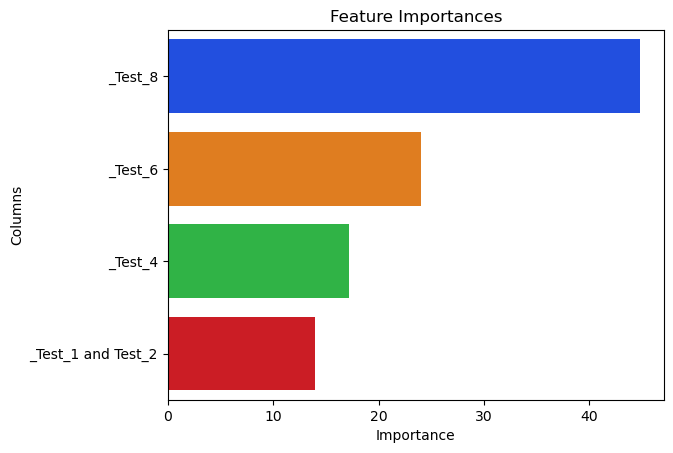

In [514]:
sns.barplot(importance,x = "Importance",y = "index",palette="bright")
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Columns")